In [10]:

import numpy as np
import math
import pandas as pd
import logging
import sys
import matplotlib.pyplot as plt
import time
from random import shuffle
import itertools
import pickle
from numpy.linalg import inv
import operator

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import pickle
from modules import *
#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', -1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
col_rs = hp.col_rs
col_es = hp.col_es

prepath = '../data/'


In [3]:
duration_222_1 = pd.read_csv(prepath + 'NY222_3760120_2015-08-11_to_2016-08-11_20180809165417.csv', skiprows=3)
duration_222_2 = pd.read_csv(prepath + 'NY222_3760120_2016-08-11_to_2017-08-11_20180809003645.csv', skiprows=3)
duration_222_3 = pd.read_csv(prepath + 'NY222_3760120_2017-08-11_to_2018-08-08_20180809004150.csv', skiprows=3)
duration_231_1 = pd.read_csv(prepath + 'NY231_4086548_2016-07-05_to_2017-07-05_20180809005536.csv', skiprows=3)
duration_231_2 = pd.read_csv(prepath + 'NY231_4086548_2017-07-05_to_2018-08-08_20180809010451.csv', skiprows=3)

duration_222 = pd.concat([duration_222_1, duration_222_2, duration_222_3])
duration_231 = pd.concat([duration_231_1, duration_231_2])

daily_222 = pd.read_csv(prepath + 'NY222_2015-08-11_to_2018-06-12_daily_20180613153105.csv', skiprows=3)
daily_231 = pd.read_csv(prepath + 'NY231_2016-07-05_to_2018-06-12_daily_20180613153815.csv', skiprows=3)

In [11]:
p231, p222_1, p222_2, p222_3 = build_patients()


In [12]:
p231.add_duration(prep.prep_duration(duration_231))

In [28]:

epoch_label_dict = pickle.load(open("epoch_label_dict.p", "rb" ))


In [19]:
a = p231.duration.loc[:,['logduration','date']].groupby('date').agg('sum')
a.loc[:,'date'] = np.array([datetime.combine(item, datetime.min.time()) for item in a.index])

ae = prep.addepoch(a, 'date', p231.epoch_info['start'], p231.epoch_info['end'], p231.epoch_info['num_per_epoch'])
#aeg = ae.loc[ae.loc[:,]]
ae.loc[:,'label'] = ae.loc[:,'epoch'].apply(lambda x: epoch_label_dict['231'][x])

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


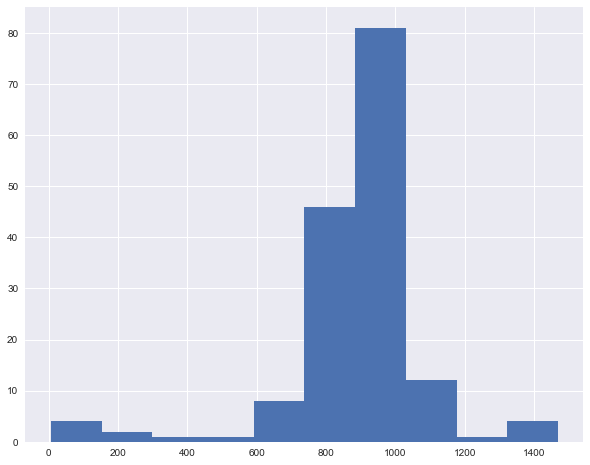

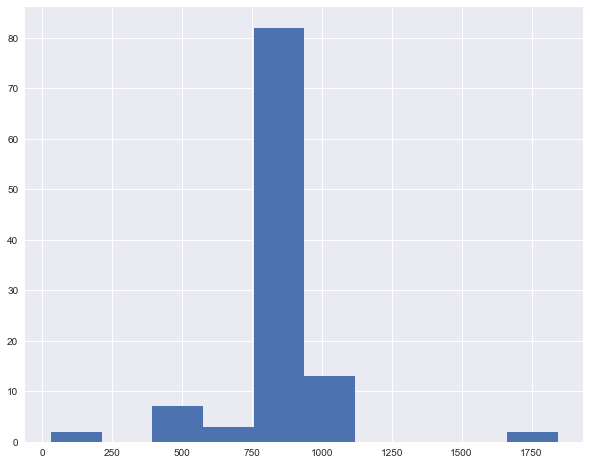

,logduration,date,epoch,label
date,,,,
2017-02-07,1050.192260,2017-02-07,0,True
2017-02-08,811.357833,2017-02-08,0,True
2017-02-09,923.737247,2017-02-09,0,True
2017-02-10,864.648320,2017-02-10,0,True
2017-02-11,1108.056098,2017-02-11,0,True
2017-02-12,877.911059,2017-02-12,0,True
2017-02-13,866.923939,2017-02-13,0,True
2017-02-14,862.142599,2017-02-14,0,True
2017-02-16,860.462400,2017-02-16,0,True


In [27]:
plt.hist(ae.loc[ae.loc[:,'label'] == True, 'logduration'])
plt.show()
plt.hist(ae.loc[ae.loc[:,'label'] == False, 'logduration'])
plt.show()
ae

In [46]:
duration_222 = prep_duration(duration_222)
duration_231 = prep_duration(duration_231)
daily_222 = prep_daily(daily_222)
daily_231 = prep_daily(daily_231)


,logduration
date,
2015-08-13,51.474614
2015-08-14,23.390928
2015-08-15,5.501258
2015-08-16,5.501258
2015-08-17,7.447168
2015-08-18,5.560682
2015-08-19,5.627621
2015-08-20,3.417727
2015-08-21,5.204007


In [8]:
#aggregate the count for each date in both daily and duration file
duration_222_count = duration_222.loc[:,[col_rs,'date']].groupby('date').agg('count')
daily_222_count = daily_222.loc[:,[col_es,'date']]
duration_231_count = duration_231.loc[:,[col_rs,'date']].groupby('date').agg('count')
daily_231_count = daily_231.loc[:,[col_es,'date']]

In [27]:
duration_231

,patient_id,device_sn,region_data_range_start,region_data_range_end,region_start_time,timezone_region,utc_start_time,duration,therapy_inhibited,a1_detect,a2_detect,b1_detect,b2_detect,a1_redetect,a2_redetect,b1_redetect,b2_redetect,date,logduration
0,4086548,193005,2016-07-05 12:41:34.0,2016-07-06 08:20:48.0,2016-07-05 12:41:34.000,US/Eastern,2016-07-05 16:41:34.0,27.0,1,1,0,0,0,4,0,0,0,2016-07-05,3.295837
1,4086548,193005,2016-07-05 12:41:34.0,2016-07-06 08:20:48.0,2016-07-05 22:01:14.500,US/Eastern,2016-07-06 02:01:14.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-05,1.945910
2,4086548,193005,2016-07-05 12:41:34.0,2016-07-06 08:20:48.0,2016-07-06 01:31:14.000,US/Eastern,2016-07-06 05:31:14.0,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
3,4086548,193005,2016-07-05 12:41:34.0,2016-07-06 08:20:48.0,2016-07-06 03:07:51.500,US/Eastern,2016-07-06 07:07:51.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
4,4086548,193005,2016-07-05 12:41:34.0,2016-07-06 08:20:48.0,2016-07-06 08:20:41.000,US/Eastern,2016-07-06 12:20:41.0,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
5,4086548,193005,2016-07-06 11:14:03.5,2016-07-07 07:41:42.5,2016-07-06 11:14:03.500,US/Eastern,2016-07-06 15:14:03.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
6,4086548,193005,2016-07-06 11:14:03.5,2016-07-07 07:41:42.5,2016-07-06 13:55:30.500,US/Eastern,2016-07-06 17:55:30.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
7,4086548,193005,2016-07-06 11:14:03.5,2016-07-07 07:41:42.5,2016-07-06 14:16:55.500,US/Eastern,2016-07-06 18:16:55.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
8,4086548,193005,2016-07-06 11:14:03.5,2016-07-07 07:41:42.5,2016-07-06 17:24:06.500,US/Eastern,2016-07-06 21:24:06.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910
9,4086548,193005,2016-07-06 11:14:03.5,2016-07-07 07:41:42.5,2016-07-06 17:28:09.500,US/Eastern,2016-07-06 21:28:09.5,7.0,1,1,0,0,0,0,0,0,0,2016-07-06,1.945910


In [9]:
count_compare_222 = daily_222_count.set_index('date').join(duration_222_count).fillna(0).rename(columns={"region_start_time": 'duration'})

In [10]:
count_compare_231 = daily_231_count.set_index('date').join(duration_231_count).fillna(0).rename(columns={"region_start_time": 'duration'})

In [11]:
output_prepath = '../fig/'
count_compare_222.to_csv(output_prepath + 'count_compare_222.csv')
count_compare_231.to_csv(output_prepath + 'count_compare_231.csv')

In [12]:
count_compare_222

,episode_starts,duration
date,,
2015-08-11,0,0.0
2015-08-12,0,0.0
2015-08-13,21,23.0
2015-08-14,11,9.0
2015-08-15,2,2.0
2015-08-16,2,2.0
2015-08-17,3,3.0
2015-08-18,2,2.0
2015-08-19,1,1.0
